In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Ge the data ready for machine learning


### Cleaning Data -> Transform Data -> Reduce Data

### Clean Data
- provide good data - garbage in garbage out
- remove row or column with empty and missing fields
- fill empty will average price
- remove outliers

### Data Transformation to make it workable to machine learning
- computer understand numbers
- color convert to rgb
- convert category into numbers

### Reduce data
- More data is better for training but it also cause computing power
- If we can get the same result with less data, we can save money

### Tree main things we have to do:
- Split the data into features and labels (usally "X" & "y")
- Fill (also called imputing) or remove missing values
- Convert non-numerical values to numerical values (also called feature encoding)



In [40]:
heart_disease = pd.read_csv("heart-disease.csv")

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((242, 13), (61, 13), (242,), (61,))

In [41]:
# 1.1) Make sure data are in numerical form

car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

# Turn categories into numbers (Make, Color, Doors)
# Although Door is a number, we can represent a simpler number to represent its category
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# 1.1 - Method-1
# OneHotEncoder() converts each category into a binary vector
# ColumnTransformer lets you apply different transformations to different columns of your dataset

# Columns to encode
categorical_features = ["Make", "Colour", "Doors"]

# Column transformer
transformer = ColumnTransformer(
    transformers=[("onehot", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

# remainder="passthrough" → keep all other columns as they are (no transformation).

# Apply transformation
transform_X = transformer.fit_transform(X)



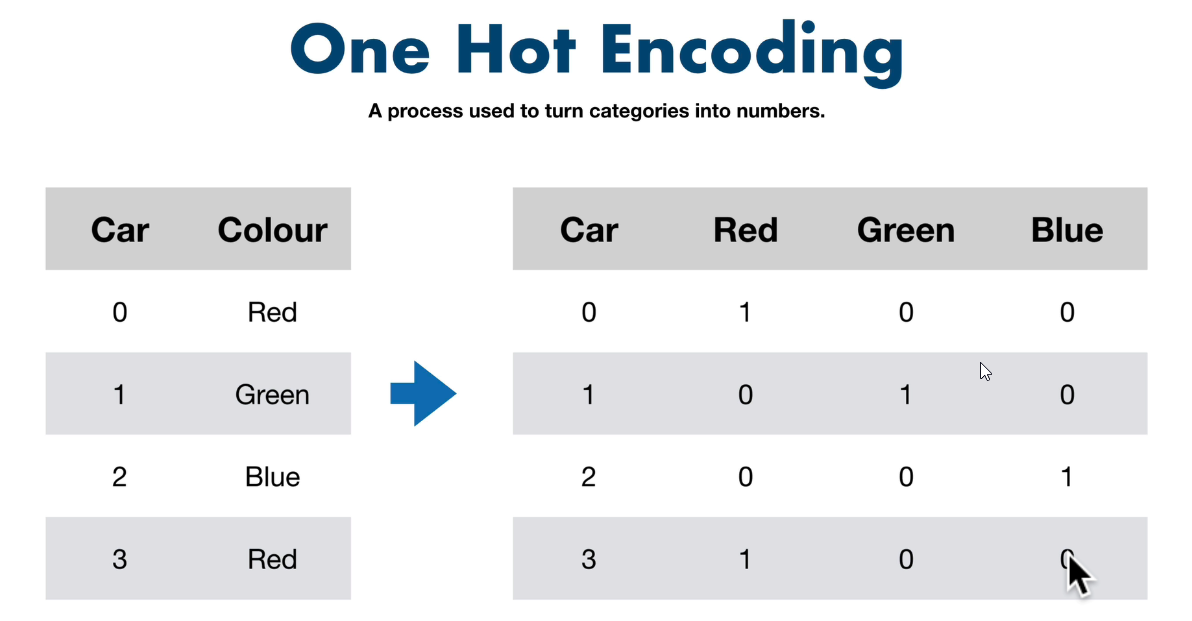

In [42]:
#2 Method 2 - use pandas dummies
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]]).astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [43]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)

In [44]:
# 2) Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
result

0.3235867221569877

In [45]:
## Deal with missing data

# 1) Fill them with some values (also known as imputation)
# 2) Remove the samples with missing data

car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

car_sales_missing.isna().sum()



Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:

car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
# 1.1 - Method-1 - fill missing features with column mean or "missing" (Pandas)

car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# As for the label (asnwer sheet), we remove it instead of filling it
car_sales_missing = car_sales_missing.dropna(subset=["Price"])
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]


# Columns to encode
categorical_features = ["Make", "Colour", "Doors"]

# Column transformer
transformer = ColumnTransformer(
    transformers=[("onehot", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

# remainder="passthrough" → keep all other columns as they are (no transformation).

# Apply transformation
transform_X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.10372982918315199

# Feature Scaling - making numerical data same scale (KM and Miles)

- Normalization - rescale value to fit 0 - 1 


- This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the `MinMaxScalar` class.
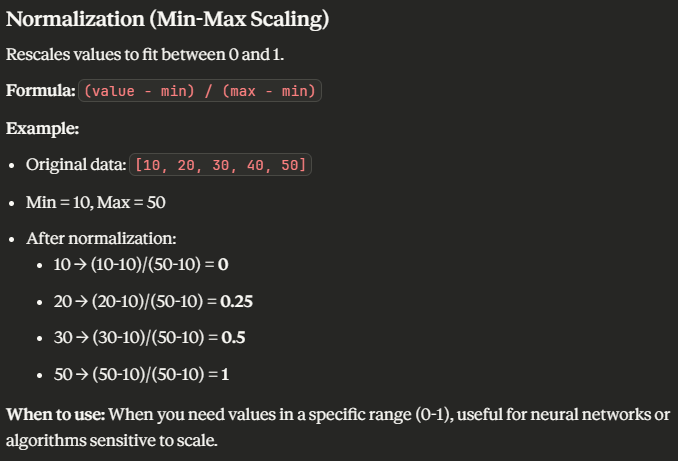

- Standardization - Center data around 0 and scale by spread

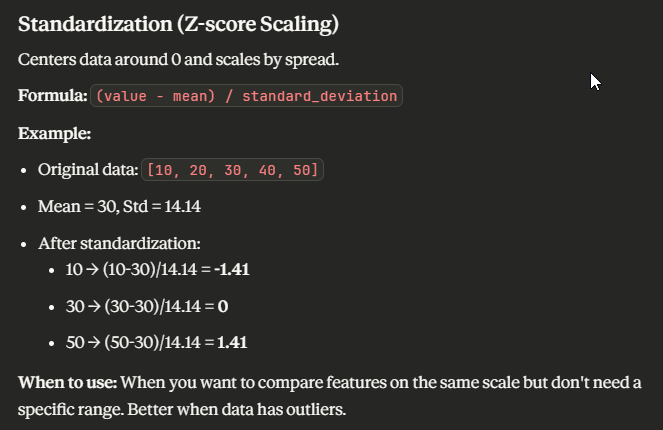

Key difference:
- Normalization = squeeze to 0 - 1 range
- Standardization = center around 0, 



In [53]:
# Fill missing values with Scikit-Learn

car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

# But drop the label column first
car_sales_missing.dropna(subset=["Price"], inplace=True)
len(car_sales_missing)

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Import the SimpleImputer
from sklearn.impute import SimpleImputer
SimpleImputer()

X.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
dtype: object

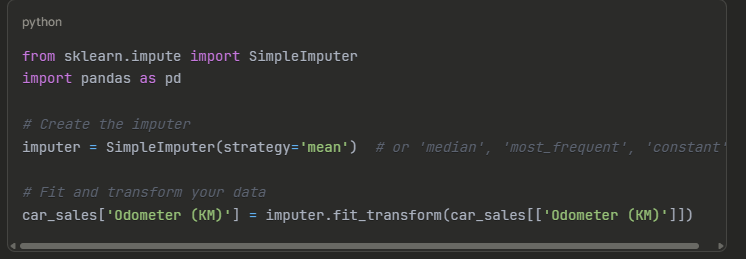

#### Fill with mean (for numerical data)
imputer = SimpleImputer(strategy='mean')

#### Fill with median (better for data with outliers)
imputer = SimpleImputer(strategy='median')

#### Fill with most frequent value (for categorical data)
imputer = SimpleImputer(strategy='most_frequent')

#### Fill with a constant value
imputer = SimpleImputer(strategy='constant', fill_value=0)

In [59]:
category_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

category_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("category_imputer", category_imputer, category_feature),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

filled_X = imputer.fit_transform(X)
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales.isna().sum()


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64